In [286]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import os
from PIL import Image

In [34]:
data_path = 'metadata.csv'
images_path = 'images'
path_anno = "annotations"

In [35]:
column_names = ['patientid','offset','sex','age','finding','survival','intubated','intubation_present','went_icu','in_icu','needed_supplemental_O2','extubated','temperature','pO2_saturation','leukocyte_count','neutrophil_count','lymphocyte_count','view','modality','date','location','folder','filename','doi','url','license','clinical_notes','other_notes']

In [36]:
len(column_names)

28

In [37]:
df = pd.read_csv(data_path, names=column_names, header=None, skiprows=[0], index_col=False)

In [38]:
df.head()

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,in_icu,...,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes
0,2,0.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
1,2,3.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
2,2,5.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
3,2,6.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
4,4,0.0,F,52.0,COVID-19,NaN,NaN,NaN,NaN,NaN,...,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN


In [39]:
df = df[['finding', 'view', 'modality', 'folder', 'filename']]\

In [40]:
df.head()

,finding,view,modality,folder,filename
0,COVID-19,PA,X-ray,images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...
1,COVID-19,PA,X-ray,images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...
2,COVID-19,PA,X-ray,images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...
3,COVID-19,PA,X-ray,images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...
4,COVID-19,PA,X-ray,images,nejmc2001573_f1a.jpeg


In [41]:
df.folder.unique()

array(['images', 'volumes'], dtype=object)

In [42]:
df.shape

(372, 5)

In [43]:
df = df[df['folder'] == 'images']

In [44]:
df.shape

(351, 5)

In [104]:
images = np.array([Image.open(os.path.join(images_path, file)).convert('L') for file in df['filename']], dtype='object')

In [109]:
# for file in df['filename'][:5]:
#     x = Image.open(os.path.join(images_path, file)).convert('L').resize((156, 156))
#     print(x.size)
#     plt.figure()
#     plt.imshow(x)

In [110]:
images.shape

(351,)

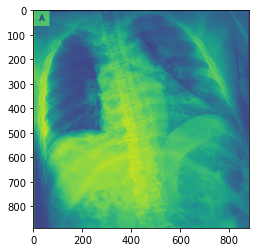

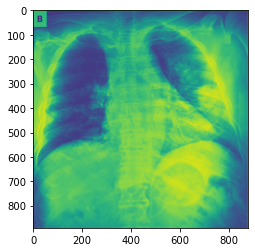

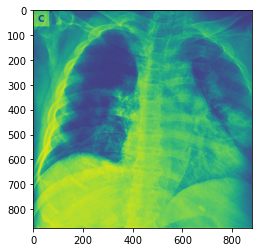

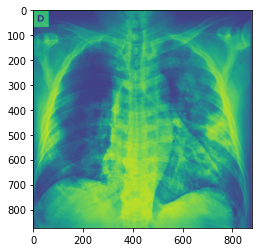

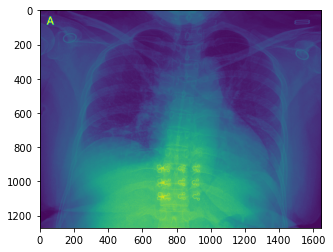

In [125]:
for image in images[:5]:
    plt.figure()
    plt.imshow(image)

In [111]:
sizes = np.array([im.size for im in images])

In [114]:
sizes.shape

(351, 2)

In [117]:
for size in sizes[:5]:
    print(size)

[882 888]
[880 891]
[882 876]
[880 874]
[1645 1272]


In [115]:
print(np.min(sizes[:, 0]), np.min(sizes[:, 1]))

157 156


In [120]:
images_resized = np.array([image.resize((156,156)) for image in images], dtype='object')

In [123]:
sizes_check = np.array([im.size for im in images_resized])

In [124]:
for size in sizes_check[:5]:
    print(size)

[156 156]
[156 156]
[156 156]
[156 156]
[156 156]


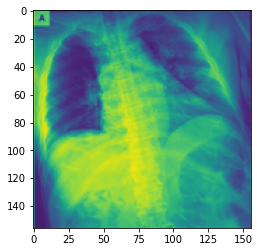

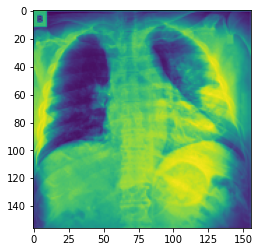

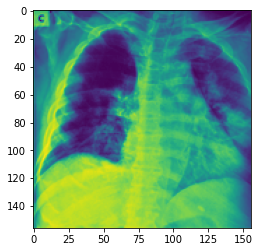

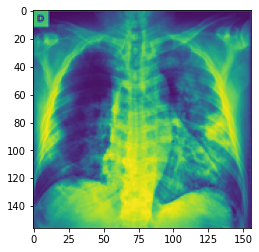

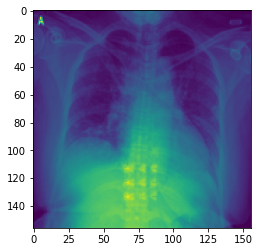

In [126]:
for image in images_resized[:5]:
    plt.figure()
    plt.imshow(image)

In [134]:
images_np = np.array([np.array(image) for image in images_resized])

In [135]:
images_np.shape

(351, 156, 156)

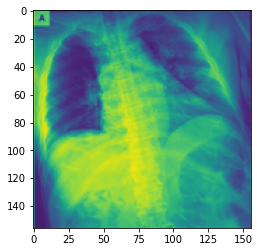

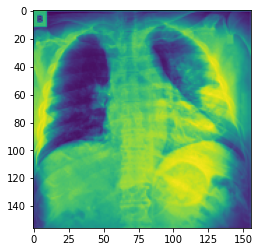

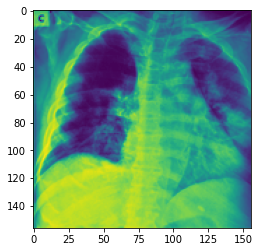

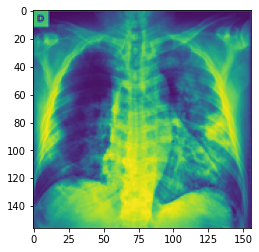

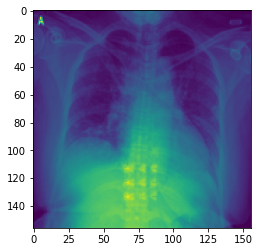

In [136]:
for image in images_np[:5]:
    plt.figure()
    plt.imshow(image)

In [137]:
print(np.min(images_np), np.max(images_np))

0 255


In [138]:
images_normal = (images_np - np.min(images_np)) / (np.max(images_np) - np.min(images_np))

In [139]:
print(np.min(images_normal), np.max(images_normal))

0.0 1.0


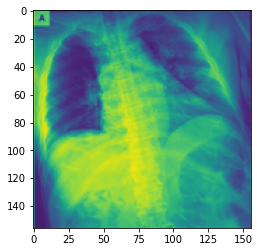

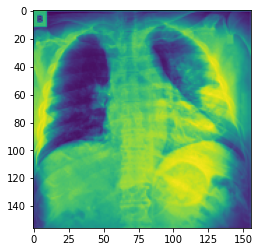

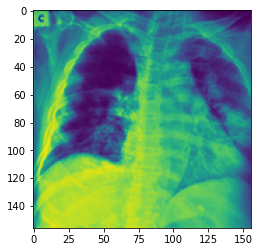

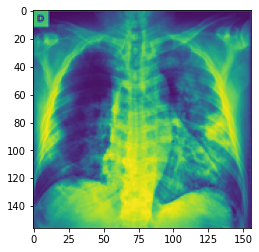

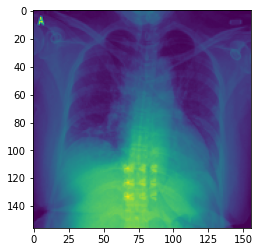

In [160]:
for image in images_normal[:5]:
    plt.figure()
    plt.imshow(image)

In [227]:
images_final = images_normal.reshape((images_normal.shape[0], -1))

In [228]:
images_final.shape

(351, 24336)

In [163]:
df.head()

,finding,view,modality,folder,filename
0,COVID-19,PA,X-ray,images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...
1,COVID-19,PA,X-ray,images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...
2,COVID-19,PA,X-ray,images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...
3,COVID-19,PA,X-ray,images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...
4,COVID-19,PA,X-ray,images,nejmc2001573_f1a.jpeg


In [170]:
df.finding.value_counts()

COVID-19          275
Streptococcus      17
SARS               16
Pneumocystis       15
COVID-19, ARDS     12
ARDS                4
E.Coli              4
No Finding          3
Legionella          2
Chlamydophila       2
Klebsiella          1
Name: finding, dtype: int64

In [179]:
df_alt = df.copy()
df_alt.loc[df_alt['finding'] != 'COVID-19', 'finding'] = 'NOT COVID'

In [180]:
df_alt.finding.value_counts()

COVID-19     275
NOT COVID     76
Name: finding, dtype: int64

In [188]:
labels = df_alt['finding'].to_numpy()

In [229]:
labels_oh = np.zeros((labels.shape[0], 2))

In [230]:
locations = {'COVID-19': 0, 'NOT COVID': 1}
for e, label in enumerate(labels):
    labels_oh[e][locations[label]] = 1

In [231]:
print(images_final.shape, labels_oh.shape)

(351, 24336) (351, 2)


In [275]:
images_2d = images_final.reshape((images_final.shape[0], int(np.sqrt(images_final.shape[1])), int(np.sqrt(images_final.shape[1])), 1))

In [276]:
idx = np.random.permutation(images_2d.shape[0])
data, labels = images_2d[idx], labels_oh[idx]

In [277]:
train_percentage = 0.8
n_train = int(train_percentage * data.shape[0])

In [278]:
train_images, train_labels = data[:n_train], labels[:n_train]
test_images, test_labels = data[n_train:], labels[n_train:]

In [279]:
train_images.shape

(280, 156, 156, 1)

In [301]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=train_images.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [302]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [303]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
9/9 [==============================] - 24s 3s/step - loss: 1.0085 - accuracy: 0.7464 - val_loss: 0.5831 - val_accuracy: 0.7324
Epoch 2/10
9/9 [==============================] - 24s 3s/step - loss: 0.5099 - accuracy: 0.7964 - val_loss: 0.6038 - val_accuracy: 0.7324
Epoch 3/10
9/9 [==============================] - 24s 3s/step - loss: 0.5055 - accuracy: 0.7964 - val_loss: 0.5884 - val_accuracy: 0.7324
Epoch 4/10
9/9 [==============================] - 28s 3s/step - loss: 0.5028 - accuracy: 0.7964 - val_loss: 0.5893 - val_accuracy: 0.7324
Epoch 5/10
9/9 [==============================] - 28s 3s/step - loss: 0.5006 - accuracy: 0.7964 - val_loss: 0.5983 - val_accuracy: 0.7324
Epoch 6/10
9/9 [==============================] - 25s 3s/step - loss: 0.5006 - accuracy: 0.7964 - val_loss: 0.5902 - val_accuracy: 0.7324
Epoch 7/10
9/9 [==============================] - 24s 3s/step - loss: 0.5024 - accuracy: 0.7964 - val_loss: 0.5920 - val_accuracy: 0.7324
Epoch 8/10
9/9 [==================

In [304]:
model.save('models/model1_lukas')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: models/model1_lukas\assets


INFO:tensorflow:Assets written to: models/model1_lukas\assets


In [315]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=train_images.shape[1:]))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.BatchNormalization())

model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(2))

In [316]:
model2.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [317]:
history2 = model2.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
9/9 [==============================] - 39s 4s/step - loss: 1.7850 - accuracy: 0.6036 - val_loss: 0.6972 - val_accuracy: 0.4225
Epoch 2/10
9/9 [==============================] - 40s 4s/step - loss: 1.0636 - accuracy: 0.8000 - val_loss: 0.5804 - val_accuracy: 0.7324
Epoch 3/10
9/9 [==============================] - 33s 4s/step - loss: 0.8060 - accuracy: 0.7964 - val_loss: 0.5794 - val_accuracy: 0.7324
Epoch 4/10
9/9 [==============================] - 33s 4s/step - loss: 0.7452 - accuracy: 0.7964 - val_loss: 0.5788 - val_accuracy: 0.7324
Epoch 5/10
9/9 [==============================] - 33s 4s/step - loss: 0.7174 - accuracy: 0.8000 - val_loss: 0.5871 - val_accuracy: 0.7324
Epoch 6/10
9/9 [==============================] - 33s 4s/step - loss: 0.8099 - accuracy: 0.8036 - val_loss: 0.6018 - val_accuracy: 0.7324
Epoch 7/10
9/9 [==============================] - 31s 3s/step - loss: 0.8523 - accuracy: 0.8071 - val_loss: 0.6108 - val_accuracy: 0.7324
Epoch 8/10
9/9 [==================